In [8]:
import kattis
user = kattis.auth('drake-cullen', 'mBz935r20O*C')

problems = user.problems(40)

In [9]:
import requests
import bs4
dates_and_difficulty = []

login = {"user": "drake-cullen", "password": "mBz935r20O*C", "script": "true"}
res = requests.post("https://open.kattis.com/login", data=login)
data={"script":"true"}


for problem in problems:
    result = requests.get(f"https://open.kattis.com/users/drake-cullen/submissions/{problem}",data=data,cookies=res.cookies)
    soup = bs4.BeautifulSoup(result.text, "html.parser")
    my_attributes = soup.find_all("td",class_="middle",attrs={"data-type" : "time"})
    try:
        date = my_attributes[-1].text.strip()
        date = date.split()[0]
        difficulty = problems[problem]['info']["difficulty"]
        if difficulty.count('.') > 1:
            difficulty = ".".join(difficulty.split(".", 2)[:2])
        dates_and_difficulty.append([difficulty, date])
    except:
        pass
    #res = json.loads(problem)
    #print(res)

In [10]:
from datetime import datetime

sorted_dates_and_difficulty = []

for diff, date in dates_and_difficulty:
    d = datetime.strptime(date, '%Y-%m-%d')
    sorted_dates_and_difficulty.append([diff, d])

In [11]:
sorted_dates_and_difficulty.sort(key=lambda y: y[1])

In [12]:
from datetime import datetime, timedelta
import copy

month_vals = []
months = []
score = 0

startDate = datetime(2019, 7, 10)
endDate = datetime.now()
 
addDays = timedelta(days=31)

cop = copy.deepcopy(sorted_dates_and_difficulty)
 
while startDate <= endDate:
    while(len(cop) > 0 and cop[0][1] <= startDate):
        score += float(cop[0][0])
        cop.pop(0)
    month_vals.append(score)
    months.append(startDate)
    startDate += addDays



In [1]:
month_vals

NameError: name 'month_vals' is not defined

In [18]:
lis = [x for x in range(33)]

In [22]:
months[0].year

2019

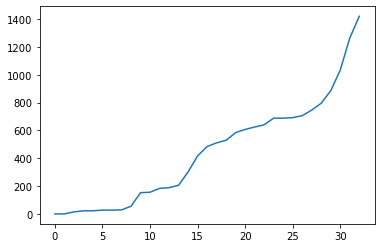

In [24]:
import matplotlib.pyplot as plt

plt.plot(lis, month_vals)
plt.show()
